In [96]:
import networkx as nx
import pandas as pd
from palmerpenguins import load_penguins
import matplotlib.pyplot as plt

Donwloading data

In [97]:
penguins=load_penguins()
targetEdges=(len(penguins)*(len(penguins)-1)/2)*0.35
print(targetEdges)

20648.6


Finding Euclidian Distances

In [104]:
edgeList=[]

for index, row in penguins.iterrows():
    for index2, row2 in penguins.iterrows():
        if index2<=index:
            continue
        edge=[]
        edge.append(index)
        edge.append(index2)
        dist=((row['bill_length_mm']-row2['bill_length_mm'])**2 + (row['bill_depth_mm']-row['bill_depth_mm'])**2 + (row['flipper_length_mm']-row['flipper_length_mm'])**2 + (row['body_mass_g']-row['body_mass_g'])**2)**0.5
        edge.append(dist)
        if dist>0: #Any NaN values present will make the dist=0, since we are ignoring edges with NaN values, we do this step
            edgeList.append(edge)


edgeList.sort(key=lambda x:x[2])
threshold=edgeList[int(targetEdges)][2]
edgeList=edgeList[:int(targetEdges)]
for e in  edgeList:
    del e[2]

print("Ecuclidian Distance Threshold is ", threshold)

Ecuclidian Distance Threshold is  3.799999999999997


Generate Network

In [99]:
G=nx.Graph()
nodeList=list(range(0, len(penguins)))
G.add_nodes_from(nodeList)
G.add_edges_from(edgeList)
print(G)

Graph with 344 nodes and 20648 edges


Community Detection

In [100]:
communities=nx.community.louvain_communities(G)
i=0
for com in communities:
    for node in com:
        penguins.at[node, 'community']=i
    i=i+1
    print(com)

{3}
{2, 258, 260, 264, 9, 12, 268, 17, 26, 27, 29, 33, 37, 296, 41, 298, 43, 46, 49, 306, 51, 308, 53, 55, 57, 61, 63, 65, 67, 69, 330, 75, 76, 79, 81, 340, 85, 91, 95, 97, 99, 101, 109, 113, 115, 119, 122, 123, 125, 127, 129, 131, 135, 137, 140, 141, 143, 151, 160, 162, 168, 176, 178, 183, 188, 189, 190, 192, 197, 208, 210, 220, 238, 246}
{0, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 18, 20, 21, 22, 23, 24, 25, 28, 30, 31, 32, 34, 35, 36, 38, 39, 40, 42, 44, 45, 47, 48, 50, 52, 54, 56, 58, 59, 60, 62, 64, 66, 68, 70, 71, 72, 74, 77, 78, 80, 82, 83, 84, 86, 87, 88, 89, 90, 92, 93, 94, 96, 98, 100, 102, 103, 104, 105, 106, 107, 108, 110, 112, 114, 116, 117, 118, 120, 121, 124, 126, 128, 130, 132, 133, 134, 136, 138, 139, 142, 144, 145, 146, 147, 148, 149, 150}
{271}
{19, 73, 111, 152, 153, 154, 155, 156, 157, 158, 159, 161, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 174, 175, 177, 179, 180, 181, 182, 184, 185, 186, 187, 191, 193, 194, 195, 196, 198, 199, 200, 201, 202, 203, 204, 

Graph Generation

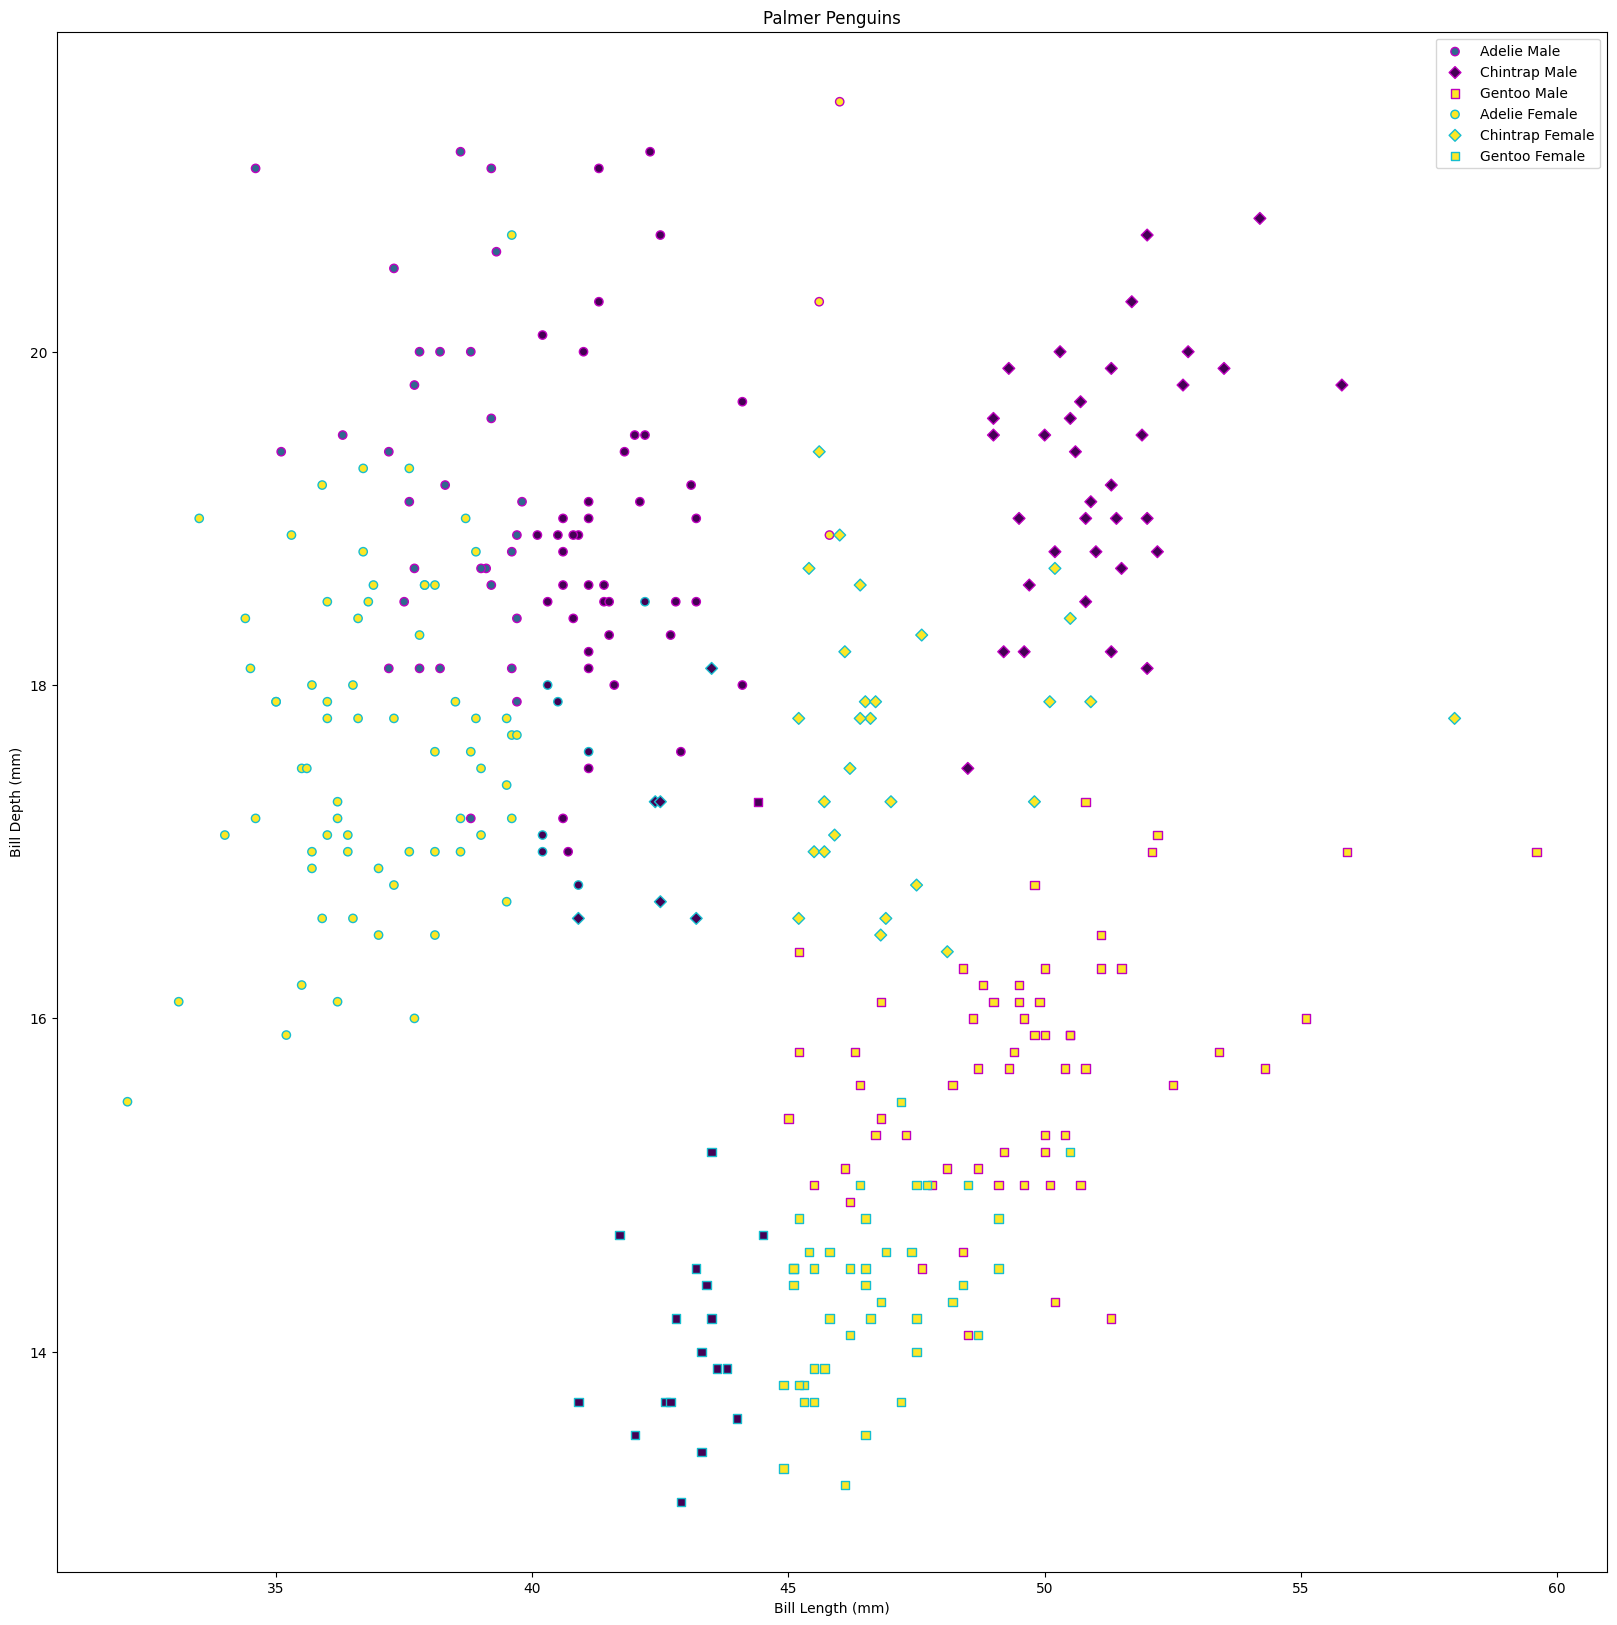

In [101]:
data1m=penguins[(penguins['species']=='Adelie') & (penguins['sex']=='male')]
data2m=penguins[(penguins['species']=='Chinstrap') & (penguins['sex']=='male')]
data3m=penguins[(penguins['species']=='Gentoo') & (penguins['sex']=='male')]
data1f=penguins[(penguins['species']=='Adelie') & (penguins['sex']=='female')]
data2f=penguins[(penguins['species']=='Chinstrap') & (penguins['sex']=='female')]
data3f=penguins[(penguins['species']=='Gentoo') & (penguins['sex']=='female')]

fig=plt.figure(figsize=(20, 20))
plt.scatter(data1m['bill_length_mm'], data1m['bill_depth_mm'], marker="o", c=data1m['community'], edgecolors='m', label='Adelie Male')
plt.scatter(data2m['bill_length_mm'], data2m['bill_depth_mm'], marker='D', c=data2m['community'], edgecolors='m', label='Chintrap Male')
plt.scatter(data3m['bill_length_mm'], data3m['bill_depth_mm'], marker="s", c=data3m['community'], edgecolors='m', label='Gentoo Male')
plt.scatter(data1f['bill_length_mm'], data1f['bill_depth_mm'], marker="o", c=data1f['community'], edgecolors='tab:cyan', label='Adelie Female')
plt.scatter(data2f['bill_length_mm'], data2f['bill_depth_mm'], marker='D', c=data2f['community'], edgecolors='tab:cyan', label='Chintrap Female')
plt.scatter(data3f['bill_length_mm'], data3f['bill_depth_mm'], marker="s", c=data3f['community'], edgecolors='tab:cyan', label='Gentoo Female')
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.title("Palmer Penguins")
plt.legend()
plt.show()